In [1]:
from sklearn.datasets import make_classification
data,_ = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=3,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4,
    class_sep=2
)

In [3]:
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import pandas as pd
import numpy as np
def show_pdf(func, data, 
             resolution = 100, 
             contours_density = 8,
             surf_density = 40,
             figsize=(10,5), cmap=cm.cividis,
             aspect='equal', margins='auto',
             s = 40, edgecolor='black', 
             markeralpha=1, markercolor='white'
            ):
    
    # range for x and y axis is determined from the dataset
    x1_min, x2_min = data.min(axis=0)
    x1_max, x2_max = data.max(axis=0)

    # plus some extra margins
    if margins == 'auto':
        x1_pad = max(3, int(0.3*(x1_max-x1_min)))
        x2_pad = max(3, int(0.3*(x2_max-x2_min)))
    else:
        x1_pad = int(margins*(x1_max-x1_min))
        x2_pad = int(margins*(x2_max-x2_min)) 

    x1_range = np.linspace(start=x1_min-x1_pad, 
                           stop=x1_max+x1_pad, num=resolution)
    x2_range = np.linspace(start=x2_min-x2_pad, 
                           stop=x2_max+x2_pad, num=resolution)

    X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)
    
    # the given func is called here 
    Z_grid = func([X1_grid, X2_grid])
    
    # draw a figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(1, 2, 1)
    c = ax.contourf(X1_grid, X2_grid, Z_grid, 
                    contours_density, cmap=cmap)
    c2 = ax.contour(X1_grid, X2_grid, Z_grid, 
                    contours_density, colors='black')
    ax.set_xlabel(r'$x^{(1)}$', fontsize=16, labelpad=7)
    ax.set_ylabel(r'$x^{(2)}$', fontsize=16, rotation=0, labelpad=8)
    ax.scatter(data[:,0], data[:,1], marker='s', 
               color=markercolor, s=s, edgecolor=edgecolor, alpha=markeralpha)
    ax.set_aspect(aspect)
    plt.clabel(c2, inline=True, fontsize=10)
    
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_surface(X1_grid, X2_grid, Z_grid, 
                    rcount=surf_density, 
                    ccount=surf_density, cmap=cmap) 
    ax.set_xlabel(r'$x^{(1)}$', fontsize=14)
    ax.set_ylabel(r'$x^{(2)}$', fontsize=14)
    
    plt.show()

In [4]:
def K(x, H):

    # unpack two dimensions
    x1, x2 = x

    # extract four components from the matrix inv(H)
    a, b, c, d = np.linalg.inv(H).flatten()

    # calculate scaling coeff to shorten the equation
    scale = 2*np.pi*np.sqrt( np.linalg.det(H))

    return np.exp(-(a*x1**2 + d*x2**2 + (b+c)*x1*x2)/2) / scale

In [5]:
def KDE(x, H, data):

    # unpack two dimensions
    x1, x2 = x

    # prepare the grid for output values
    output = np.zeros_like(x1)

    # process every sample
    for sample in data:
        output += K([x1-sample[0], x2-sample[1]], H)

    return output

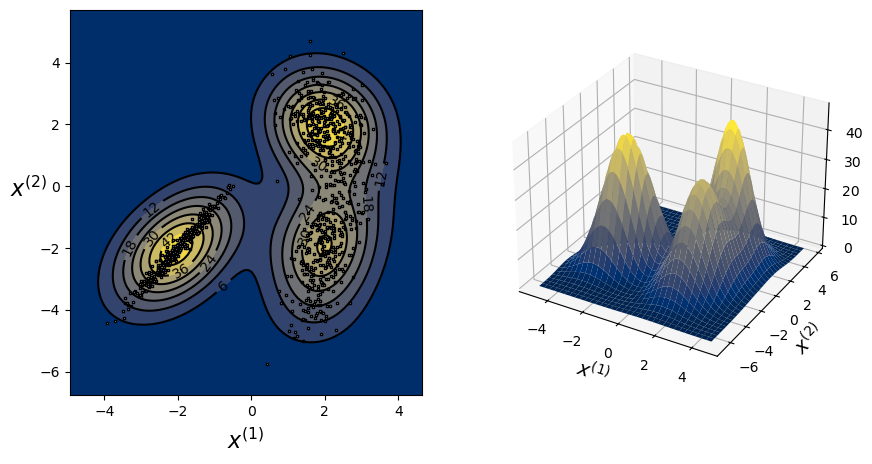

In [6]:
# logarithmic scale is more appropriate for this data
from functools import partial


H = [[1, 0],
     [0, 1]]

# size of the kernel
s = 0.7

KDE_partial = partial(KDE, H=s*np.array(H), data=data)

show_pdf(func=KDE_partial, data=data, aspect='auto', 
         markeralpha=1, s=1.5, margins=0.15)